# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go


from math import factorial

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [3]:
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")
target_test = pd.read_csv("/content/drive/MyDrive/target.csv")

In [4]:
train.drop(columns=["row_id"], inplace=True)
train

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-6.536743e-06,...,0.000084,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-6.536743e-06,...,0.000151,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-9.536743e-06,...,0.000124,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica
199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,-7.536743e-06,...,0.000115,0.000131,0.000110,0.000213,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,Streptococcus_pneumoniae
199998,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000086,-0.000043,0.001914,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Staphylococcus_aureus


In [5]:
test.drop(columns=["row_id"], inplace=True)
test

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,-0.000008,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
1,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,-0.000010,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,-0.000008,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
3,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,-0.000008,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
4,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-9.536743e-07,-0.000008,-4.291534e-05,-0.000108,-0.000194,-0.000234,-0.000195,-0.000110,-0.000043,-0.000010,...,0.000159,0.000559,0.000489,0.000499,0.000899,0.000443,0.000047,0.000148,0.000101,4.046326e-06
99996,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
99997,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,0.000914,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
99998,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07


In [22]:
print('Train set - missing values: \t', train.isnull().sum().sum())
print('Test set - missing values: \t', test.isnull().sum().sum())

Train set - missing values: 	 0
Test set - missing values: 	 0


In [37]:
target_train = train["target"]
target_train

0           Streptococcus_pyogenes
1              Salmonella_enterica
2              Salmonella_enterica
3              Salmonella_enterica
4               Enterococcus_hirae
                    ...           
199995         Salmonella_enterica
199996      Streptococcus_pyogenes
199997    Streptococcus_pneumoniae
199998       Staphylococcus_aureus
199999       Klebsiella_pneumoniae
Name: target, Length: 200000, dtype: object

In [38]:
pd.DataFrame({
    'count': target_train.value_counts()
}).sort_index()

,count
Bacteroides_fragilis,20139
Campylobacter_jejuni,20063
Enterococcus_hirae,19947
Escherichia_coli,19958
Escherichia_fergusonii,19937
Klebsiella_pneumoniae,19847
Salmonella_enterica,20030
Staphylococcus_aureus,19929
Streptococcus_pneumoniae,20074
Streptococcus_pyogenes,20076


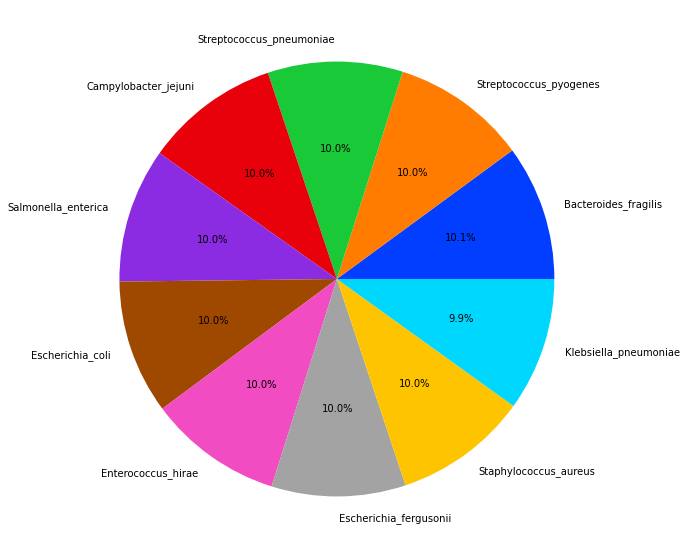

In [45]:
plt.figure(figsize=(12,10))
plt.pie(
        target_train.value_counts(),
        labels = target_train.value_counts().index, 
        colors = sns.color_palette('bright'),
        autopct='%.1f%%'
    )
plt.show()

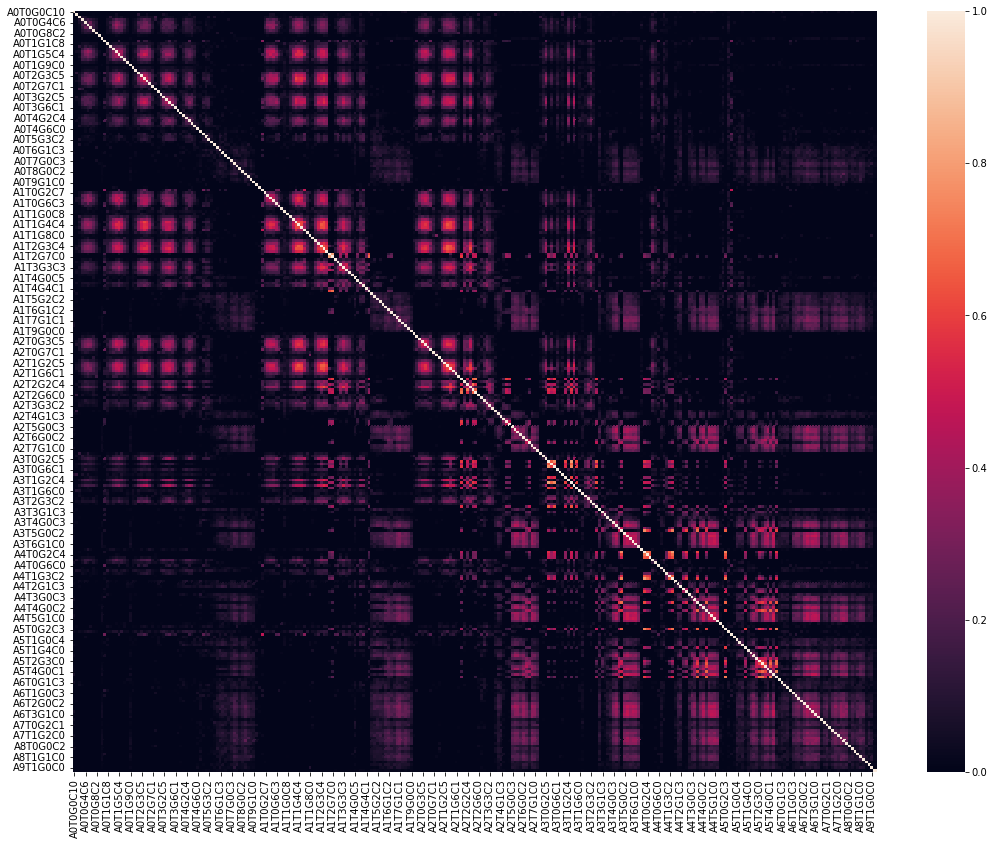

In [26]:
plt.figure(figsize=(18, 14))
sns.heatmap(
    train.corr(), 
    vmin=0
)
plt.show()

In [6]:
correlation = train.corr()
threshold = 0.7

corr_pairs = (
    correlation[abs(correlation) > threshold][correlation != 1.0]
).unstack().dropna().to_dict()

pd.DataFrame(
    list(
        set([(tuple(sorted(key)), corr_pairs[key]) for key in corr_pairs])
    ), columns=['pair', 'corr']
)

,pair,corr
0,"(A5T0G2C3, A5T5G0C0)",0.727308
1,"(A3T0G5C2, A3T1G3C3)",0.757429
2,"(A4T0G1C5, A4T1G4C1)",0.793490
3,"(A5T4G0C1, A5T5G0C0)",0.745554
4,"(A2T2G0C6, A2T2G5C1)",0.709855
5,"(A3T4G3C0, A4T1G4C1)",0.734005
6,"(A2T2G2C4, A2T2G4C2)",0.711353
7,"(A4T0G1C5, A5T0G2C3)",0.742615
8,"(A4T1G4C1, A5T0G2C3)",0.701431
9,"(A4T0G1C5, A4T0G2C4)",0.717416


Let's look at the unique values of an arbitrary feature. We notice:

1. Although the feature is a floating point number, there are not 200000 unique values, but only about one hundred.
2. The last few digits are always the same (they always end with 0846558 from 1.00846558e-05 through 9.70846558e-05).

In [28]:
np.unique(train.A0T0G2C8)

array([-4.29153442e-05, -4.19153442e-05, -4.09153442e-05, -3.99153442e-05,
       -3.89153442e-05, -3.79153442e-05, -3.69153442e-05, -3.59153442e-05,
       -3.49153442e-05, -3.39153442e-05, -3.29153442e-05, -3.19153442e-05,
       -3.09153442e-05, -2.99153442e-05, -2.89153442e-05, -2.79153442e-05,
       -2.69153442e-05, -2.59153442e-05, -2.49153442e-05, -2.39153442e-05,
       -2.29153442e-05, -2.19153442e-05, -2.09153442e-05, -1.99153442e-05,
       -1.89153442e-05, -1.79153442e-05, -1.69153442e-05, -1.59153442e-05,
       -1.49153442e-05, -1.39153442e-05, -1.29153442e-05, -1.19153442e-05,
       -1.09153442e-05, -9.91534424e-06, -8.91534424e-06, -7.91534424e-06,
       -6.91534424e-06, -5.91534424e-06, -4.91534424e-06, -3.91534424e-06,
       -2.91534424e-06, -1.91534424e-06, -9.15344238e-07,  8.46557617e-08,
        1.08465576e-06,  2.08465576e-06,  3.08465576e-06,  4.08465576e-06,
        5.08465576e-06,  6.08465576e-06,  7.08465576e-06,  8.08465576e-06,
        9.08465576e-06,  

This observation strongly suggests that these values originally were integers. These integers were divided by 1000000 and a constant was subtracted.

# Preprocessing

The [paper](https://www.frontiersin.org/articles/10.3389/fmicb.2020.00257/full) describes this process and gives the formula for the additive constant, which they call bias. With the help of this formula, we can convert the floating point numbers back to the original integers:

In [7]:
def bias(w, x, y, z):
    return factorial(10) / (factorial(w) * factorial(x) * factorial(y) * factorial(z) * 4**10)

def bias_of(s):
    w = int(s[1:s.index('T')])
    x = int(s[s.index('T')+1:s.index('G')])
    y = int(s[s.index('G')+1:s.index('C')])
    z = int(s[s.index('C')+1:])
    return factorial(10) / (factorial(w) * factorial(x) * factorial(y) * factorial(z) * 4**10)

In [8]:
elements = [e for e in train.columns if e != 'target']
train_i = pd.DataFrame({col: ((train[col] + bias_of(col)) * 1000000).round().astype(int)
                        for col in elements})
test_i = pd.DataFrame({col: ((test[col] + bias_of(col)) * 1000000).round().astype(int)
                       for col in elements})

In [9]:
train_i

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1000,0,1000,0,0,0,0,...,0,0,0,1000,1000,0,0,0,0,0
2,0,8,50,243,468,510,443,239,44,3,...,85,170,91,167,192,115,20,18,29,2
3,1,4,55,359,692,762,596,311,40,3,...,111,237,143,266,288,196,31,25,56,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,10,40,290,550,530,400,320,20,0,...,60,210,100,190,230,70,10,70,30,0
199996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1000,1000,0,0,0,0,0
199997,1,11,38,83,181,203,163,99,38,2,...,71,201,174,196,299,137,26,45,31,1
199998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2000,0,0,0,0,0,0


The integers sum up to one million in every row:

In [35]:
train_i.sum(axis=1).min(), train_i.sum(axis=1).max()

(1000000, 1000000)

In some rows all entries are multiples of 10 or of 1000  

We see that there are four gcd values (1, 10, 1000 and 10000) with equal frequencies. Connecting this result with what they write in the paper, we understand this part of the experiment:

For every row, they take the DNA of a bacterium and cut it into decamers (DNA substrings of length 10). Then they put 1000000, 100000, 1000 or 100 decamers into their machine, and the machine counts how many times every of the 286 types from A0T0G0C10 to A10T0G0C0 occurs. This is what they call the spectrum (one could as well call it a histogram with 286 bins). They normalize the spectrum by dividing all counts by the row sum and subtracting the bias.

Every bacterium has its own characteristic spectrum, and the competition task is predicting the bacterium's name from the spectrum of a sample. If the sample spectrum is made from a million decamers, we'll have accurate estimates of the true frequencies and predicting the name will be easy; if the spectrum is made from only 100 decamers, we have little information and the prediction will be hard (the classes overlap). We can see the influence of the number of decamers in the following four PCA plots:

## Feature Extraction

In [10]:
train['gcd'] = np.gcd.reduce(train_i[elements], axis=1)
test['gcd'] = np.gcd.reduce(test_i[elements], axis=1)

np.unique(train['gcd'], return_counts=True), np.unique(test['gcd'], return_counts=True)

((array([    1,    10,  1000, 10000]), array([49969, 50002, 50058, 49971])),
 (array([    1,    10,  1000, 10000]), array([25208, 24951, 24930, 24911])))

In [11]:
le = LabelEncoder()
train['target_num'] = le.fit_transform(train.target)

In [12]:
target_test['target_num'] = le.transform(target_test.target)
target_test

,row_id,target,target_num
0,200000,Escherichia_fergusonii,4
1,200001,Salmonella_enterica,6
2,200002,Enterococcus_hirae,2
3,200003,Salmonella_enterica,6
4,200004,Staphylococcus_aureus,7
...,...,...,...
99995,299995,Streptococcus_pneumoniae,8
99996,299996,Bacteroides_fragilis,0
99997,299997,Bacteroides_fragilis,0
99998,299998,Bacteroides_fragilis,0


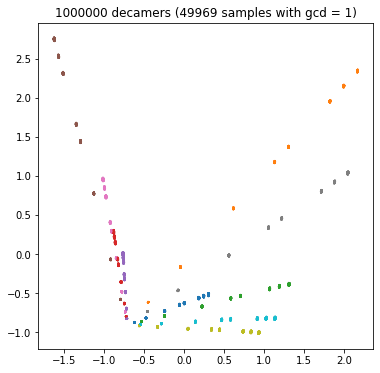

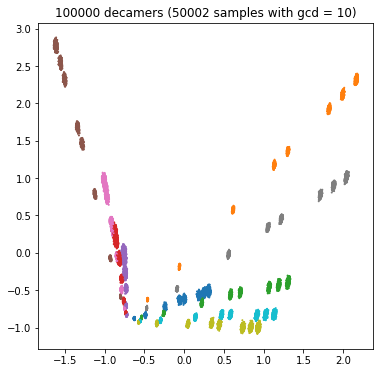

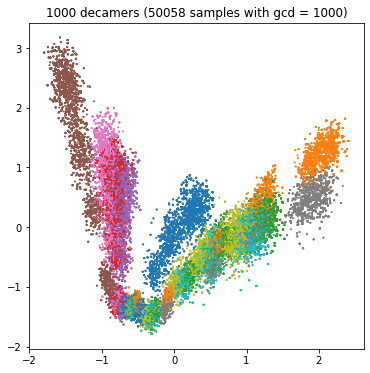

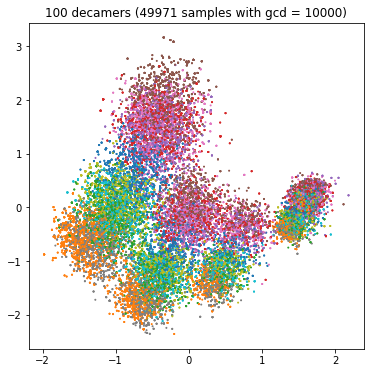

In [45]:
for scale in np.sort(train['gcd'].unique()):
    # Compute the PCA
    pca = PCA(whiten=True, random_state=1)
    pca.fit(train_i[elements][train['gcd'] == scale])

    # Transform the data so that the components can be analyzed
    Xt_tr = pca.transform(train_i[elements][train['gcd'] == scale])
    Xt_te = pca.transform(test_i[elements][test['gcd'] == scale])

    # Plot a scattergram, projected to two PCA components, colored by classification target
    plt.figure(figsize=(6,6))
    plt.scatter(Xt_tr[:,0], Xt_tr[:,1], c=train.target_num[train['gcd'] == scale], cmap='tab10', s=1)
    plt.title(f"{1000000 // scale} decamers ({(train['gcd'] == scale).sum()} samples with gcd = {scale})")
    plt.show()

**Insight:**

- We may want to create four separate classifiers for the four GCD values. For GCD = 1, we expect high accuracy; for GCD = 10000, accuracy will be lower.
- If we create only a single classifier, the gcd can be used as an additional feature.

### A third of the data are duplicates
Counting the duplicates for the four GCD values separately, we see that most duplicates occur for the high GCD values. This can be explained: If every observation consists of 100 decamers in 286 bins, we should expect more duplicates than if 1000000 decamers are put in 286 bins.

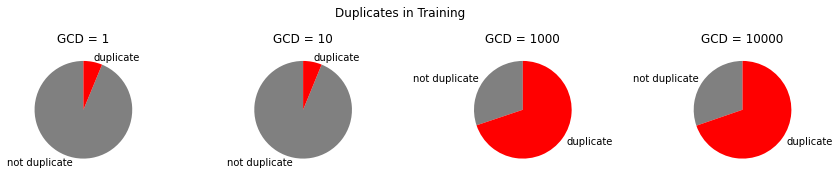

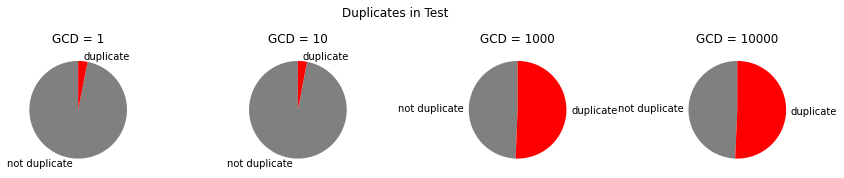

In [47]:
def plot_duplicates_per_gcd(df, title):
    plt.figure(figsize=(14, 3))
    plt.tight_layout()
    for i, gcd in enumerate(np.unique(df.gcd)):
        plt.subplot(1, 4, i+1)
        duplicates = df[df.gcd == gcd][elements].duplicated().sum()
        non_duplicates = len(df[df.gcd == gcd]) - duplicates
        plt.pie([non_duplicates, duplicates],
                labels=['not duplicate', 'duplicate'],
                colors=['gray', 'r'],
                startangle=90)
        plt.title(f"GCD = {gcd}")
    plt.subplots_adjust(wspace=0.8)
    plt.suptitle(title)
    plt.show()
        
plot_duplicates_per_gcd(train, title="Duplicates in Training")
plot_duplicates_per_gcd(test, title="Duplicates in Test")

**Insight:**

- We can reduce training and inference time by dropping the duplicates (and adjusting the sample weights).
- If we don't drop the duplicates, we must ensure that they don't inflate the cv scores. If the validation fold contains duplicates of a training fold's values, cv scores will be too high.
- There seems to be a fundamental difference between the low gcds (which have few duplicates) and the high gcds (which have many duplicates).

<hr>
Now we plot two arbitrary features at the highest precision (1000000 decamers). We see that the points of every class are grouped into eight clusters, the eight clusters lie on a straight line, and all these straight lines intersect in the origin:

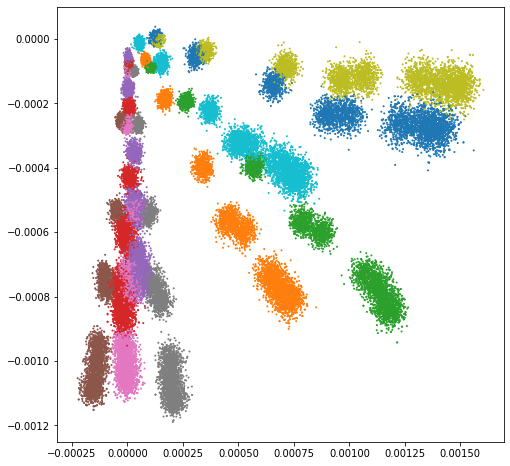

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(train.iloc[:,240][train['gcd'] == 1],
            train.iloc[:,181][train['gcd'] == 1],
            c=train.target_num[train['gcd'] == 1],
            cmap='tab10', s=1)
plt.show()

Again, this is explained in the paper: Although every bacterium has its characteristic spectrum, the experiment produces a lot of noise. They model this noise by replacing a part of the bacterium's decamers by random decamers, and this amounts to a scaling of the spectrum towards the origin.

The original clusters (far away from the origin) do not overlap, and classification is easy. With higher error rates, the clusters get nearer to the origin and start to overlap. Of course: higher error rates make classification more difficult.

The following histograms show that there are eight scalings (corresponding to eight error rates), and that the scalings are the same for all ten bacteria. We can read the eight values out of the histograms or determine them by a one-dimensional k-means clustering. The seven scaled-down clusters have size 550 and no duplicates within them; the unscaled cluster has size 1100 (of which 800 are unique and 300 are duplicates).

In [13]:
train_final = train.drop_duplicates(keep='first').reset_index().drop(columns=['target', 'index'])
train_final

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,gcd,target_num
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,10000,9
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,1000,6
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,1,6
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,1,6
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,10000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123988,-9.536743e-07,1.046326e-05,0.000057,0.000006,0.000080,0.000260,0.000140,0.000096,-0.000033,-0.000010,...,0.000057,0.000044,0.000014,-0.000033,-9.536743e-06,0.000010,-0.000010,-9.536743e-07,10,5
123989,-9.536743e-07,-4.536743e-06,0.000002,0.000042,0.000066,0.000018,0.000057,0.000031,-0.000002,-0.000007,...,0.000053,0.000120,0.000133,0.000088,1.146326e-05,0.000010,0.000027,4.632568e-08,1,3
123990,-9.536743e-07,-4.536743e-06,-0.000019,-0.000053,-0.000092,-0.000129,-0.000099,-0.000045,-0.000026,-0.000009,...,0.000328,0.000310,0.000545,0.000244,5.546326e-05,0.000073,0.000075,4.632568e-08,1,0
123991,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-0.000010,...,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,10,6


In [14]:
train_final_i = train_i.drop_duplicates(keep='first').reset_index().drop(columns=['index'])
train_final_i

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1000,0,1000,0,0,0,0,...,0,0,0,1000,1000,0,0,0,0,0
2,0,8,50,243,468,510,443,239,44,3,...,85,170,91,167,192,115,20,18,29,2
3,1,4,55,359,692,762,596,311,40,3,...,111,237,143,266,288,196,31,25,56,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123988,0,20,100,120,280,500,340,210,10,0,...,70,100,100,130,100,10,0,20,0,0
123989,0,5,45,156,266,258,257,145,41,3,...,92,208,96,206,219,131,21,20,37,1
123990,0,5,24,61,108,111,101,69,17,1,...,133,444,371,396,631,287,65,83,85,1
123991,0,10,40,290,550,530,400,320,20,0,...,60,210,100,190,230,70,10,70,30,0


# Modeling

In [15]:
X_train = train_final.drop(columns=['target_num'])
y_train = train_final['target_num']

X_test = test
y_test= target_test['target_num']

In [84]:
# train_final_i
# test_i

In [28]:
train_40k = pd.concat([X_train, y_train], axis=1).sample(40000)

In [32]:
X_10 = train_40k.drop(columns=['target_num'])
y_10 = train_40k['target_num']

In [35]:
N_SPLITS = 7
y_preds = []

folds = StratifiedKFold(n_splits=N_SPLITS,random_state=101, shuffle=True)

for fold, (train_id, test_id) in enumerate(folds.split(X_10, y_10)):
    X_tr = X_10.iloc[train_id]
    y_tr = y_10.iloc[train_id]
    X_valid = X_10.iloc[test_id]
    y_valid = y_10.iloc[test_id]
    
    model = KNeighborsClassifier(3)
    model.fit(X_tr, y_tr)
    
    
    print(f'Fold: {fold + 1}')
    print(f'Training Accuracy   :- {(model.score(X_tr, y_tr)*100).round(2)}%')
    print(f'Validation Accuracy :- {(model.score(X_valid, y_valid)*100).round(2)}%')
    print('-' * 30)
    
    y_preds.append(model.predict(X_test))

Fold: 1
Training Accuracy   :- 96.2%
Validation Accuracy :- 91.08%
------------------------------
Fold: 2
Training Accuracy   :- 96.19%
Validation Accuracy :- 91.5%
------------------------------
Fold: 3
Training Accuracy   :- 96.1%
Validation Accuracy :- 91.25%
------------------------------
Fold: 4
Training Accuracy   :- 96.22%
Validation Accuracy :- 90.18%
------------------------------
Fold: 5
Training Accuracy   :- 96.11%
Validation Accuracy :- 91.18%
------------------------------
Fold: 6
Training Accuracy   :- 96.15%
Validation Accuracy :- 91.25%
------------------------------
Fold: 7
Training Accuracy   :- 96.09%
Validation Accuracy :- 91.48%
------------------------------


**UMAP**: https://umap-learn.readthedocs.io/en/latest/parameters.html  
For getting better accuracy

### Try and attempt your own UMAP using the attached documentation and sample code below

In [ ]:
import umap

embedding = umap.UMAP(n_components = 2, 
                      n_neighbors = 10, 
                      min_dist = 0.99,
                      metric='correlation').fit_transform(train_40k.drop(['target_num'], 
                                                                     axis=1))

In [ ]:
colors = pd.factorize(train_40k.loc[:, 'target_num'])
colors_dict = {
        0: 'Streptococcus_pyogenes',
        1: 'Salmonella_enterica',
        2: 'Enterococcus_hirae',
        3: 'Escherichia_coli',
        4: 'Campylobacter_jejuni',
        5: 'Streptococcus_pneumoniae',
        6: 'Staphylococcus_aureus',
        7: 'Escherichia_fergusonii',
        8: 'Bacteroides_fragilis',
        9: 'Klebsiella_pneumoniae'
}
color_list = sns.color_palette(None, 10)

fig, ax = plt.subplots(figsize=(12,12))
for color_key in colors_dict.keys():
    indexs = colors[0] == color_key
    temp_embedding = embedding[indexs, :]
    ax.scatter(temp_embedding[:, 0], temp_embedding[:, 1], 
                c=color_list[color_key], 
                edgecolor='none', 
                alpha=0.80,
                label=colors_dict[color_key],
                s=10)
plt.legend(bbox_to_anchor=(1, 1), fontsize="x-large", markerscale=2.)
plt.title('UMAP', fontsize=18);

<img src="https://www.kaggleusercontent.com/kf/87647775/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..GxxTXAM6t_Vyjbhz47-ukw.EY7cM2EtCMGV2VednusrxKO2ohzRamC_S_eZPwNAVfKQ6vdT92EC5gqvjmYWqnRfVVs6eVrZYCsyExG9kVsBYsY1ch_541iIggMOEJpvEExuwIjHqfF0lQhf_po90BEhFvCYMOA4YJxTJPTIBemnG-m3buYzwZr-AJqp8PSXaSx48tUWLJ9qdg9-Rx2BZreKYZrhrdE6Fjj76Q96uq-mfEFBAFxn3tVrMXTd_9ftI8LcoJyIkEKdUhl5D6wyNbCt94ShbiT_MeFMkbStr1QKvMbD1weFB7tQCVpazx4RqkpaxqNn9NDGxMhvmC5Fq-pFujc58ubf5TNuO5yGIkjzlAnpBwoMUNV57Ghmq7zuADpZAxVXvQ4lBCSlEv5JfHcrkeOFlHShKEVLgAs00Ed0WO2vmsK-GleWYkHW8MDJDSqTFKxQ2fkGVbSx-J4WD656enPL56Vonp2cqEp00QrurI2KiPgT9fhyOUdp09lTB8BiGxI7wIa_Arlz3gyZJkr0574ofrJnA5T2RD17qhz3nlIshn7svJaHcOxN1yrmBiWIph2Fmvo1KDvBj9Q-HqVdF9ija1TKR4QyGix_lvbZLpLRGARbS4quBdL_KEM8sxXPXcZvl4lsPhYWDxqsSrJh9MGkDCSXQTUFFYu7qP4qT9BimMf-WFutrW6hjkdto71C8dHUnQPbqT543j7bLG4M.cHKvQKtKTHG--xwVCBmxcg/__results___files/__results___13_0.png" />